In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import matplotlib

import ydata_profiling
from ydata_profiling.utils.cache import cache_file

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [2]:
#Load vehicle fuel type data for years 2018-2022 into pandas

vd22 = pd.read_csv('vehicle_fuel_type_2022.csv')
vd21 = pd.read_csv('vehicle_fuel_type_2021.csv')
vd20 = pd.read_csv('vehicle_fuel_type_2020.csv')
vd19 = pd.read_csv('vehicle_fuel_type_2019.csv')
vd18 = pd.read_csv('vehicle_fuel_type_2018.csv')

/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_47726/1550789048.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  vd22 = pd.read_csv('vehicle_fuel_type_2022.csv')
/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_47726/1550789048.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  vd21 = pd.read_csv('vehicle_fuel_type_2021.csv')
/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_47726/1550789048.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  vd20 = pd.read_csv('vehicle_fuel_type_2020.csv')
/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_47726/1550789048.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  vd19 = pd.read_csv('vehicle_fuel_type_2019.csv')
/var/folders/b6/_m6td1sj1gx6y7djysg9kvjr0000gn/T/ipykernel_47726/155

In [3]:
vd22.head(20)

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
0,12/31/2022,90000,2010,Gasoline,OTHER/UNK,Light,1
1,12/31/2022,90000,2012,Hybrid Gasoline,OTHER/UNK,Light,1
2,12/31/2022,90000,2013,Gasoline,OTHER/UNK,Light,1
3,12/31/2022,90000,<2009,Gasoline,OTHER/UNK,Heavy,19
4,12/31/2022,90000,<2009,Gasoline,OTHER/UNK,Light,16
5,12/31/2022,90000,<2009,Gasoline,OTHER/UNK,Unk,7
6,12/31/2022,90000,<2009,Gasoline,FORD,Light,19
7,12/31/2022,90000,<2009,Gasoline,PLYMOUTH,Light,35
8,12/31/2022,90000,<2009,Gasoline,CHEVROLET,Light,20
9,12/31/2022,90000,<2009,Unk,OTHER/UNK,Unk,21


In [4]:
vd22.value_counts('Duty')

Duty
Light    567691
Unk      116724
Heavy     82639
dtype: int64

In [5]:
vd21.shape

(722465, 7)

In [6]:
#Create list of our files to combine
#2018 data not used because partial data (was tabulated in October of 2018 and not at end of the year)
frames = [vd22,vd21,vd20,vd19]

In [7]:
#Vertically concat all vehicle fuel data into one DataFrame

vehicle_data = pd.concat(frames)

In [8]:
vehicle_data.columns

Index(['Date', 'Zip Code', 'Model Year', 'Fuel', 'Make', 'Duty', 'Vehicles'], dtype='object')

In [9]:
#Create ydata profile report 

report = vehicle_data.profile_report(
    sort=None, html={"style": {"full_width": True}}, progress_bar=False
)
report

In [10]:
vehicle_data.shape

(2769882, 7)

In [11]:
vehicle_data[vehicle_data.duplicated() == True]

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles


In [12]:
vehicle_data['Fuel'].unique()

array(['Gasoline', 'Hybrid Gasoline', 'Unk', 'Diesel and Diesel Hybrid',
       'Flex-Fuel', 'Natural Gas', 'Battery Electric', 'Plug-in Hybrid',
       'Other', 'Hydrogen Fuel Cell'], dtype=object)

In [13]:
#Small number of rows for 'OOS' so we can drop these
vehicle_data['Zip Code'].value_counts()

OOS      6308
95747    3231
95762    2923
95828    2833
95691    2758
         ... 
94385       1
94364       1
94360       1
94351       1
94286       1
Name: Zip Code, Length: 9923, dtype: int64

In [14]:
len(vehicle_data['Zip Code'].unique())

9923

In [15]:
#Load income data into pandas

income_data = pd.read_csv('Personal_Income_By_Zip_Code.csv')

In [16]:
income_data.head()

,Taxable Year,Zip Code,State,City,County,Returns,CA AGI,Total Tax Liability,CountyLatitude,CountyLongitude,Geo County,Geo City,Geo ZipCode
0,2020,92137,CA,San Diego,San Diego,188,38663083,3084980,32.789640,-117.193658,POINT (-117.1936577 32.78964014),POINT (-117.16171 32.71568),NaN
1,2020,94557,CA,Hayward,Alameda,107,5104485,159000,37.720226,-122.164352,POINT (-122.1643521 37.72022591),POINT (-122.08556 37.67134),NaN
2,2020,93005,CA,Ventura,Ventura,227,16117556,899344,34.277091,-119.217850,POINT (-119.2178496 34.27709072),POINT (-119.29232 34.28082),NaN
3,2020,93227,CA,Goshen,Tulare,354,23665658,1764599,36.282543,-118.265210,POINT (-118.2652098 36.28254312),POINT (-85.83695 41.58918),NaN
4,2020,93523,CA,Edwards,Kern,693,30550251,907583,35.376768,-118.807357,POINT (-118.8073572 35.37676773),POINT (-117.93907 34.92778),POINT (-117.93907 34.92778)


In [17]:
income_data['AGI_calc'] = income_data['CA AGI']/income_data['Returns']
income_data['AGI_calc'].describe().apply(lambda x: format(x, 'f'))

count        68588.000000
mean         84794.976858
std        1149859.726985
min       -2215751.908840
25%          32796.716898
50%          44771.562544
75%          64082.769974
max      191436550.900000
Name: AGI_calc, dtype: object

In [18]:
vehicle_data.groupby(['Zip Code','Fuel'])
vehicle_data.head(50)

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
0,12/31/2022,90000,2010,Gasoline,OTHER/UNK,Light,1
1,12/31/2022,90000,2012,Hybrid Gasoline,OTHER/UNK,Light,1
2,12/31/2022,90000,2013,Gasoline,OTHER/UNK,Light,1
3,12/31/2022,90000,<2009,Gasoline,OTHER/UNK,Heavy,19
4,12/31/2022,90000,<2009,Gasoline,OTHER/UNK,Light,16
5,12/31/2022,90000,<2009,Gasoline,OTHER/UNK,Unk,7
6,12/31/2022,90000,<2009,Gasoline,FORD,Light,19
7,12/31/2022,90000,<2009,Gasoline,PLYMOUTH,Light,35
8,12/31/2022,90000,<2009,Gasoline,CHEVROLET,Light,20
9,12/31/2022,90000,<2009,Unk,OTHER/UNK,Unk,21


In [19]:
vehicle_data['Date'].unique()

array(['12/31/2022', '1/1/2022', '1/1/2021', '1/1/2020'], dtype=object)

In [20]:
yr_values = ['2022','2021','2020','2019','2018']
yr_conditions = [(vehicle_data['Date'] == '12/31/2022'),
                 (vehicle_data['Date'] == '1/1/2022'),
                 (vehicle_data['Date'] == '1/1/2021'),
                 (vehicle_data['Date'] == '1/1/2020'),
                 (vehicle_data['Date'] == '10/1/2018')
                ]

In [21]:
vehicle_data['Year'] = np.select(yr_conditions,yr_values)

In [22]:
vehicle_data.value_counts('Date')

Date
12/31/2022    767054
1/1/2022      722465
1/1/2021      677969
1/1/2020      602394
dtype: int64

In [23]:
vehicle_data.value_counts('Year')

Year
2022    767054
2021    722465
2020    677969
2019    602394
dtype: int64

In [24]:
temp = vehicle_data.groupby(['Zip Code', 'Year','Fuel'], as_index=False)['Vehicles'].sum()

In [25]:
type(temp)

pandas.core.frame.DataFrame

In [26]:
temp

,Zip Code,Year,Fuel,Vehicles
0,90000,2021,Diesel and Diesel Hybrid,37
1,90000,2021,Gasoline,182
2,90000,2021,Other,6
3,90000,2022,Diesel and Diesel Hybrid,36
4,90000,2022,Gasoline,118
...,...,...,...,...
87137,OOS,2022,Hydrogen Fuel Cell,42
87138,OOS,2022,Natural Gas,1331
87139,OOS,2022,Other,52
87140,OOS,2022,Plug-in Hybrid,4899


In [27]:
temp.columns

Index(['Zip Code', 'Year', 'Fuel', 'Vehicles'], dtype='object')

<Axes: xlabel='Fuel', ylabel='Vehicles'>

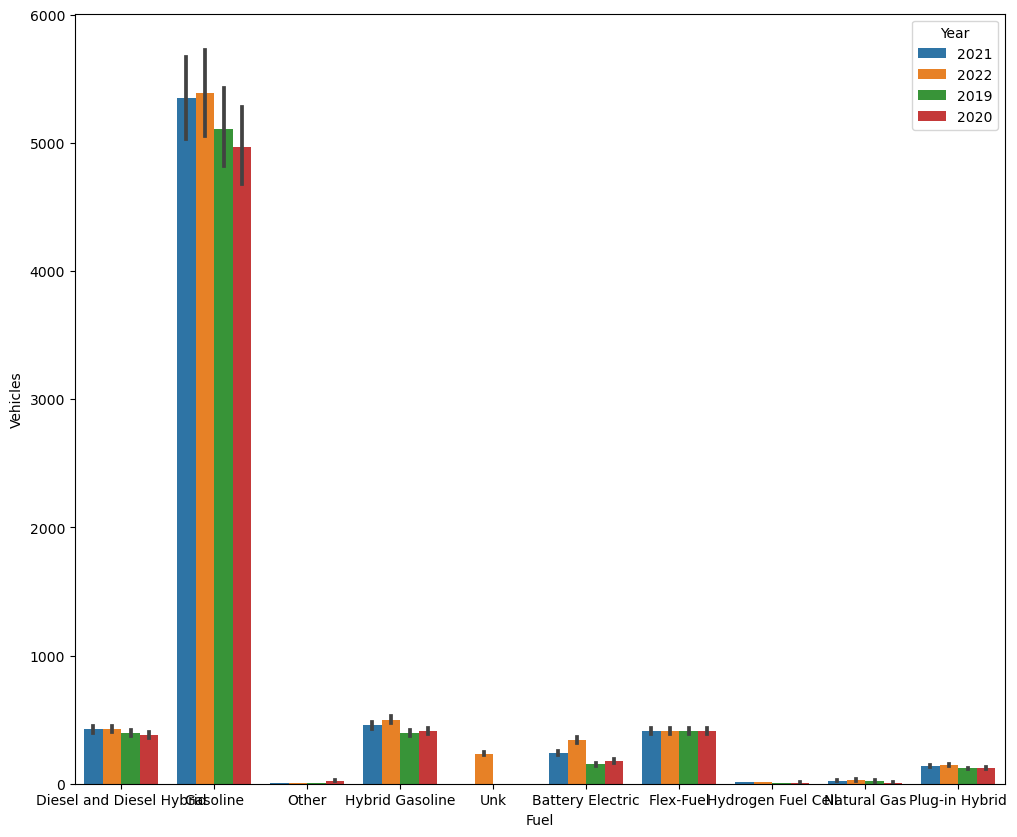

In [44]:
plt.subplots(figsize=(12, 10))
fig = sns.barplot(x='Fuel', y='Vehicles', hue='Year', data=temp, saturation=0.8)
fig

In [ ]:
plt.show()
matplotlib.use('tkagg')

In [29]:
#Dropping columns for Model Year (ambiguous data), Make (majority is unknown due to non-random bias)
# and Duty (majority are Light)

vehicle_data.drop(['Model Year', 'Make', 'Duty'], axis = 1, inplace = True)

In [30]:
#Verify columns have been dropped
vehicle_data.columns

Index(['Date', 'Zip Code', 'Fuel', 'Vehicles', 'Year'], dtype='object')

In [31]:
temp.shape

(87142, 4)

In [32]:
len(temp['Zip Code'].unique())

9923

In [33]:
#Drop all rows where zip code is 'OOS'
temp.drop(temp[temp['Zip Code'] == 'OOS'].index, inplace = True)

In [34]:
#Confirmed that total # of unique zip codes only reduced by 1
len(temp['Zip Code'].unique())

9922

In [35]:
temp

,Zip Code,Year,Fuel,Vehicles
0,90000,2021,Diesel and Diesel Hybrid,37
1,90000,2021,Gasoline,182
2,90000,2021,Other,6
3,90000,2022,Diesel and Diesel Hybrid,36
4,90000,2022,Gasoline,118
...,...,...,...,...
87100,99990,2022,Diesel and Diesel Hybrid,1
87101,99999,2019,Gasoline,5
87102,99999,2020,Gasoline,7
87103,99999,2021,Gasoline,5


In [ ]:
report2 = temp.profile_report(
    sort=None, html={"style": {"full_width": True}}, progress_bar=False
)
report2

In [36]:
temp[temp['Vehicles'] == 116692]

,Zip Code,Year,Fuel,Vehicles
805,90045,2021,Gasoline,116692


In [37]:
temp_sm = temp.head(50)

In [ ]:
fig

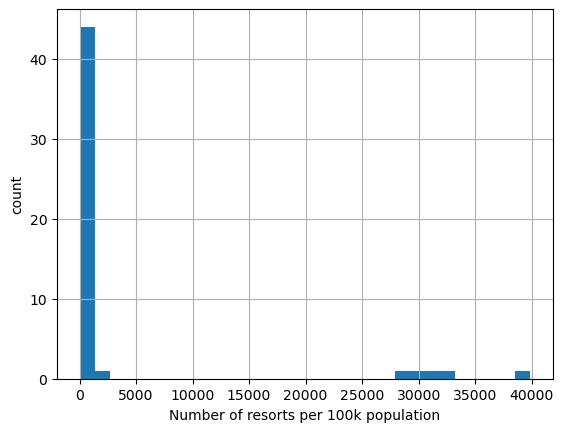

In [38]:
temp_sm.Vehicles.hist(bins = 30)
plt.xlabel('Number of resorts per 100k population')
plt.ylabel('count');

In [49]:
# Need to create column shows vehicle as percent of total vehicles in the zipcode
temp2 = temp.groupby(['Zip Code','Year'],as_index=False)['Vehicles'].sum()

In [50]:
temp2

,Zip Code,Year,Vehicles
0,90000,2021,225
1,90000,2022,321
2,90001,2021,35507
3,90001,2022,35045
4,90002,2021,32564
...,...,...,...
20476,99990,2022,1
20477,99999,2019,5
20478,99999,2020,7
20479,99999,2021,5


In [56]:
temp.drop('Vehicle Total', inplace = True, axis = 1)

In [57]:
temp

,Zip Code,Year,Fuel,Vehicles
0,90000,2021,Diesel and Diesel Hybrid,37
1,90000,2021,Gasoline,182
2,90000,2021,Other,6
3,90000,2022,Diesel and Diesel Hybrid,36
4,90000,2022,Gasoline,118
...,...,...,...,...
87100,99990,2022,Diesel and Diesel Hybrid,1
87101,99999,2019,Gasoline,5
87102,99999,2020,Gasoline,7
87103,99999,2021,Gasoline,5


In [58]:
df = pd.merge(temp,temp2,on = ['Zip Code', 'Year'],how = 'inner')

In [60]:
df.head(50)

,Zip Code,Year,Fuel,Vehicles_x,Vehicles_y
0,90000,2021,Diesel and Diesel Hybrid,37,225
1,90000,2021,Gasoline,182,225
2,90000,2021,Other,6,225
3,90000,2022,Diesel and Diesel Hybrid,36,321
4,90000,2022,Gasoline,118,321
5,90000,2022,Hybrid Gasoline,1,321
6,90000,2022,Unk,166,321
7,90001,2021,Battery Electric,52,35507
8,90001,2021,Diesel and Diesel Hybrid,813,35507
9,90001,2021,Flex-Fuel,1329,35507


In [61]:
df.rename({'Vehicles_x': 'Vehicles', 'Vehicles_y': 'Vehicles Total'}, axis=1, inplace=True)

In [62]:
df

,Zip Code,Year,Fuel,Vehicles,Vehicles Total
0,90000,2021,Diesel and Diesel Hybrid,37,225
1,90000,2021,Gasoline,182,225
2,90000,2021,Other,6,225
3,90000,2022,Diesel and Diesel Hybrid,36,321
4,90000,2022,Gasoline,118,321
...,...,...,...,...,...
87100,99990,2022,Diesel and Diesel Hybrid,1,1
87101,99999,2019,Gasoline,5,5
87102,99999,2020,Gasoline,7,7
87103,99999,2021,Gasoline,5,5


In [63]:
df['Vehicle Ratio'] = df['Vehicles']/df['Vehicles Total']

In [70]:
df.dtypes

Zip Code           object
Year               object
Fuel               object
Vehicles            int64
Vehicles Total      int64
Vehicle Ratio     float64
dtype: object

<Axes: xlabel='Year', ylabel='Vehicle Ratio'>

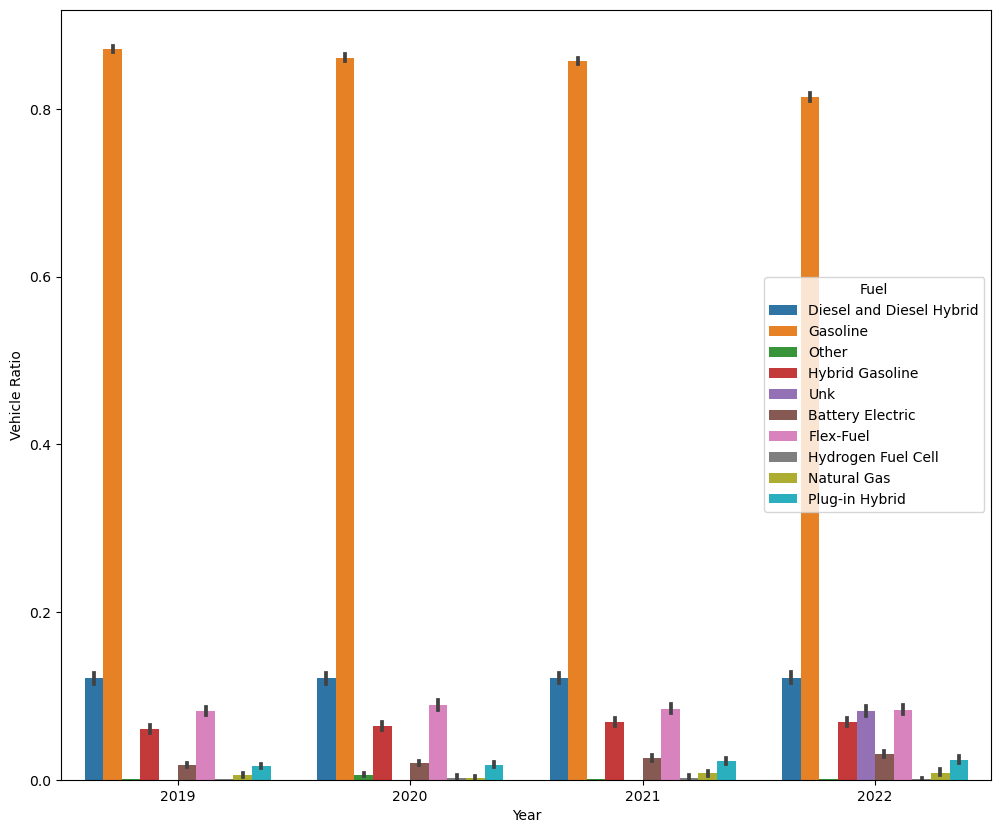

In [67]:
plt.subplots(figsize=(12, 10))
fig = sns.barplot(x='Year', y='Vehicle Ratio', hue='Fuel', data=df, saturation=0.8, order = ['2019','2020','2021','2022'])
fig